In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
df=pd.read_csv("KNN_Project_Data")

In [5]:
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


C:\Users\STUDENT\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\STUDENT\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\STUDENT\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\STUDENT\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


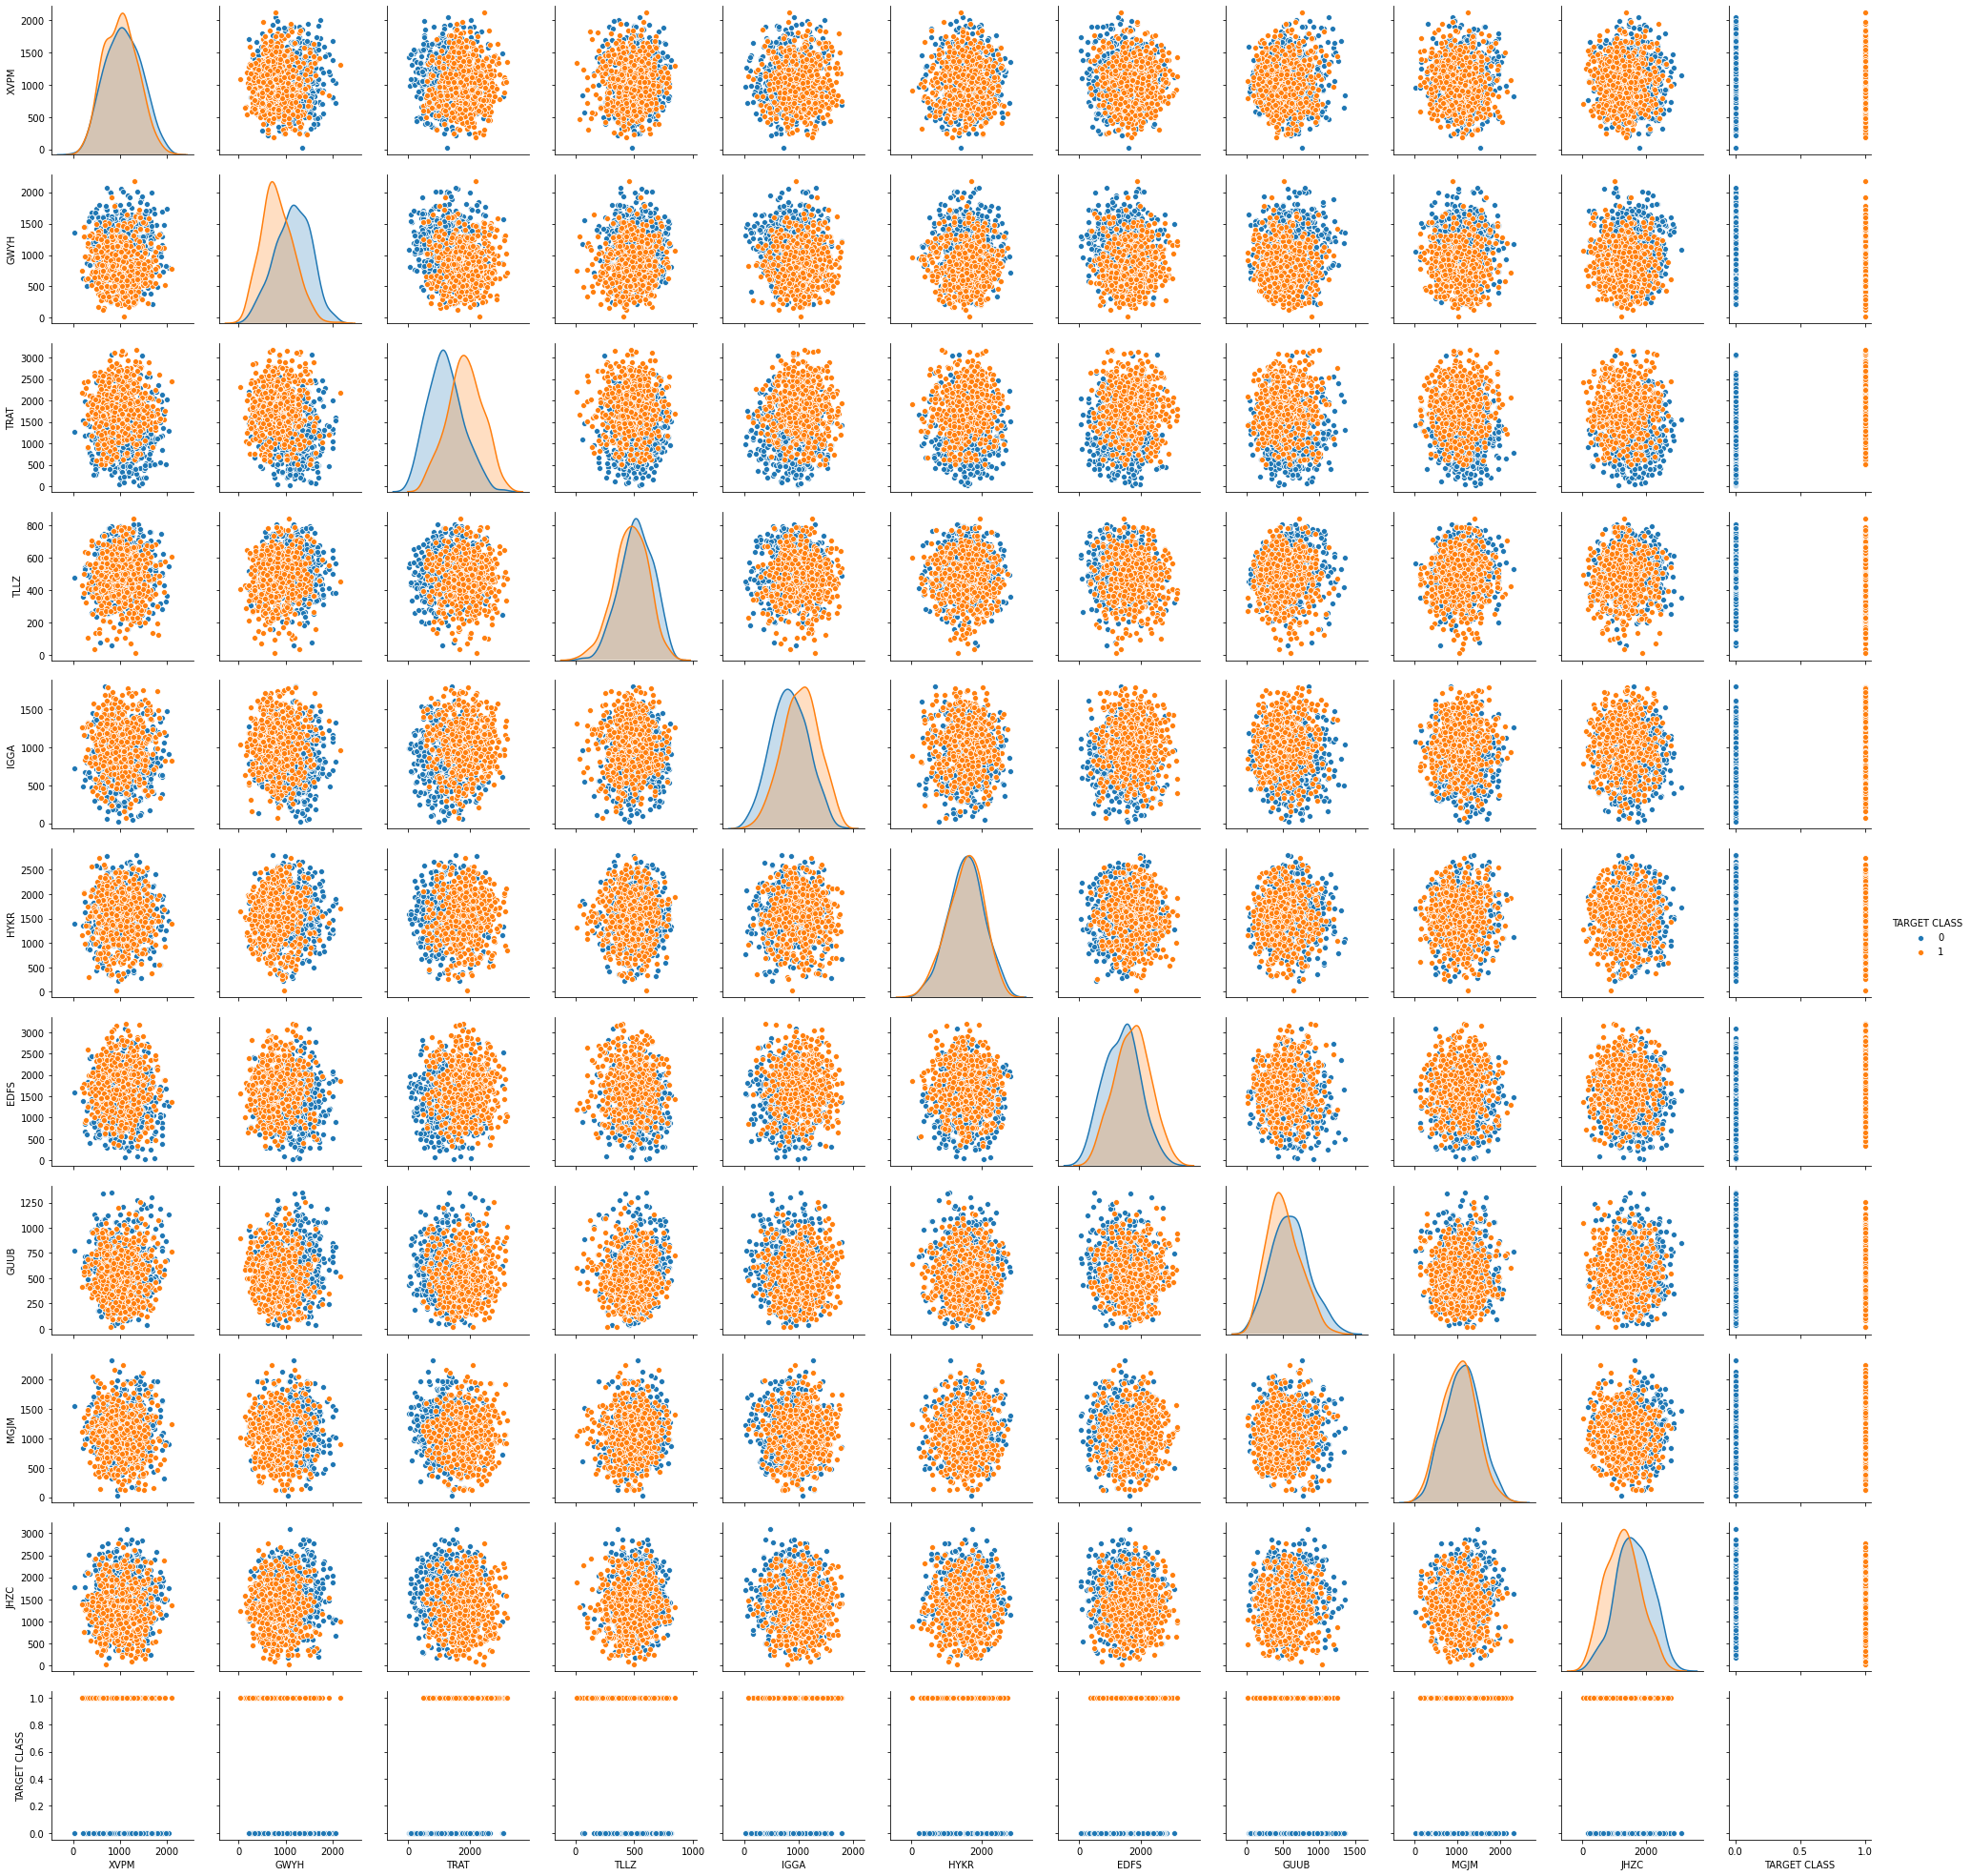

In [6]:
sns.pairplot(df,hue='TARGET CLASS')

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler=StandardScaler()

In [9]:
scaler.fit(X=df.drop('TARGET CLASS',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [10]:
x=scaler.transform(X= df.drop('TARGET CLASS', axis = 1))

In [11]:
tdf=pd.DataFrame(x,columns=df.columns[:-1])
tdf.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


In [12]:
from sklearn.model_selection import train_test_split

In [17]:
y=df['TARGET CLASS']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state = 101)

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
KNN = KNeighborsClassifier(n_neighbors = 1).fit(x_train,y_train)

In [22]:
y_p=KNN.predict(x_test)

In [23]:
from sklearn.metrics import confusion_matrix, classification_report

In [24]:
print(confusion_matrix(y_test,y_p))

[[109  43]
 [ 41 107]]


In [25]:
print(classification_report(y_test,y_p))

              precision    recall  f1-score   support

           0       0.73      0.72      0.72       152
           1       0.71      0.72      0.72       148

    accuracy                           0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.72      0.72      0.72       300



In [28]:
err_rates=[]
for idx in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=idx)
    knn.fit(x_train,y_train)
    pred_idx=knn.predict(x_test)
    err_rates.append(np.mean(y_test!=pred_idx))

Text(0.5, 1.0, 'Error Rate vs K-value')

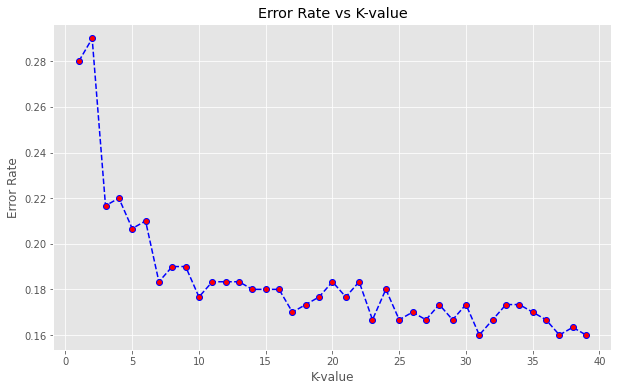

In [29]:
plt.style.use('ggplot')
plt.subplots(figsize = (10,6))
plt.plot(range(1,40),err_rates,linestyle='dashed',color='blue',marker='o',markerfacecolor='red')
plt.xlabel('K-value')
plt.ylabel('Error Rate')
plt.title('Error Rate vs K-value')

In [31]:
KNN=KNeighborsClassifier(n_neighbors=30).fit(X_train,y_train)
y_p=KNN.predict(x_test)
print('WITH K=30')
print('')
print(confusion_matrix(y_test,y_p))
print('')
print(classification_report(y_test,y_p))

WITH K=30

[[124  28]
 [ 24 124]]

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       152
           1       0.82      0.84      0.83       148

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300

